Status: ✅ done

## Exercise 11

---

In this exercise, we are going to practice `classification metrics`. You should focus on both knowing how to compute metrics as well as how to interpret them. The exercises below will give you a plenty of opportunities to do that.

> Imports

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### Fundamental knowledge

---

> Use confusion matrix to compute recall, precision, f1-score

We are given the following `confusion matrix`:

In [ ]:
cm = np.array([[3, 3, 0], [4, 2, 2], [1, 3, 2]])
print(cm)

[[3 3 0]
 [4 2 2]
 [1 3 2]]


Since it is 3 x 3, we have 3 classes. In addition note, that rows denote `true` values and columns denote `predicted` values. Pay attention to this detail every time you see some confusion matrix since there is no standard that people follow. 🤦🏻‍♂️ Now, for each respective class, we want to know what is the `precision`:

In [ ]:
print("Precision\n---")
pp_precision = cm[0, 0]/cm[:, 0].sum()
print(">> Pinky Pie (0): {:>5.3f}".format(pp_precision))
rr_precision = cm[1, 1]/cm[:, 1].sum()
print(">> Rarity (1): {:>8.3f}".format(rr_precision))
nw_precision = cm[2, 2]/cm[:, 2].sum()
print(">> Narwal (2): {:>8.3f}".format(nw_precision))

Precision
---
>> Pinky Pie (0): 0.375
>> Rarity (1):    0.250
>> Narwal (2):    0.500


Notice the approach: 
- `numerator`: diagonal term
- `denominator`: sum of column 

This should make intuitive sense since precision tells us
> Proportion of correctly classified samples out of all samples predicted for the give class

We continue with recall:

In [ ]:
print("Recall\n---")
pp_recall = cm[0, 0]/cm[0, :].sum()
print(">> Pinky Pie (0): {:>5.3f}".format(pp_recall))
rr_recall = cm[1, 1]/cm[1, :].sum()
print(">> Rarity (1): {:>8.3f}".format(rr_recall))
nw_recall = cm[2, 2]/cm[2, :].sum()
print(">> Narwal (2): {:>8.3f}".format(nw_recall))

Recall
---
>> Pinky Pie (0): 0.500
>> Rarity (1):    0.250
>> Narwal (2):    0.333


Almost identical approach, except now we are `dividing` by sum of a given row rather then a given column. Again, based on the recall's definition:

> Out of all samples in the given class, how many have we managed to find

Finally, if we want to compute `f1-score`, then we take `harmonized mean` of the precision and recall:

In [ ]:
# F1 definition
f1 = lambda p, r: (2*p*r)/(p + r)

# F1 scores
print("F1\n---")
pp_f1 = f1(pp_precision, pp_recall)
print(">> Pinky Pie (0): {:>5.3f}".format(pp_f1))
rr_f1 = f1(rr_precision, rr_recall)
print(">> Rarity (1): {:>8.3f}".format(rr_f1))
nw_f1 = f1(nw_precision, nw_recall)
print(">> Narwal (2): {:>8.3f}".format(nw_f1))

F1
---
>> Pinky Pie (0): 0.429
>> Rarity (1):    0.250
>> Narwal (2):    0.400


Finally, we can also compute some global metrics (`macro f1`, `accuracy`):

In [ ]:
print("Macro-F1: {:.3f}".format((pp_f1 + rr_f1 + nw_f1)/3))
print("Accuracy: {:.3f}".format(cm.diagonal().sum()/cm.sum()))

Macro-F1: 0.360
Accuracy: 0.350


> Does the assignment which class is 0 and which class is 1 matter?

In practical setting where you would be dealing with `binary` classification, you are usually given true classes as strings. When you pass these into for instance `sklearn` model, it automatically maps them to 0 and 1. But does it matter if Pinky Pie is 0 and Rarity 1 or vice versa? Well, as long as you are aware which one is mapped to 1, for which the sklearn then reports for instance `f1-score, recall or precision`, then it is fine. We can examine this on the following confusion matrix:

In [ ]:
cm2 = np.array([[30, 60], [20, 50]])
print(cm2)

[[30 60]
 [20 50]]


Again, we compute `precision`:

In [ ]:
print("Precision\n---")
pp_precision = cm2[0, 0]/cm2[:, 0].sum()
print(">> Pinky Pie (0): {:>5.3f}".format(pp_precision))
rr_precision = cm2[1, 1]/cm2[:, 1].sum()
print(">> Rarity (1): {:>8.3f}".format(rr_precision))

Precision
---
>> Pinky Pie (0): 0.600
>> Rarity (1):    0.455


and `recall`:

In [ ]:
print("Recall\n---")
pp_recall = cm2[0, 0]/cm2[0, :].sum()
print(">> Pinky Pie (0): {:>5.3f}".format(pp_recall))
rr_recall = cm2[1, 1]/cm2[1, :].sum()
print(">> Rarity (1): {:>8.3f}".format(rr_recall))

Recall
---
>> Pinky Pie (0): 0.333
>> Rarity (1):    0.714


Finally, we can also compute `f1-score`:

In [ ]:
print("F1\n---")
pp_f1 = f1(pp_precision, pp_recall)
print(">> Pinky Pie (0): {:>5.3f}".format(pp_f1))
rr_f1 = f1(rr_precision, rr_recall)
print(">> Rarity (1): {:>8.3f}".format(rr_f1))

F1
---
>> Pinky Pie (0): 0.429
>> Rarity (1):    0.556


So if we care about `f1-score` for Rarity, then we get `.556`. But now imagine, that you actually care about Pinky Pie, but would not realize that the `.556` is for Rarity 😫 If you care about both, one of the options is to use `macro-f1`:

In [ ]:
print("Macro-F1: {:.3f}".format((pp_f1 + rr_f1)/2))

Macro-F1: 0.492


Now, what is the test error?

In [ ]:
print("Test error: {:.3f}".format(1 - cm2.diagonal().sum()/cm2.sum()))

Test error: 0.500


Does this actually change if we change our assumption about the 0-1 loss? Probably... But how? Let's assume that our loss matrix looks as follows:

In [ ]:
loss_matrix = np.array([[0, 2], [1, 0]])
print(loss_matrix)

[[0 2]
 [1 0]]


If we want to be really mathy, we write the following for the 0-1 loss:

$$
\mathcal{L}_{0 / 1}(h)=\frac{1}{n} \sum_{i=1}^n \delta_{h\left(\mathbf{x}_i\right) \neq y_i}, \text { where } \delta_{h\left(\mathbf{x}_i\right) \neq y_i}= \begin{cases}1, & \text { if } h\left(\mathbf{x}_i\right) \neq y_i \\ 0, & \text { o.w. }\end{cases}
$$

This of course equivalent to take the sum along the second diagoanl (right upper corner to left lower corner) and then divide by the total number of samples. However, if we change the weights, we have to somehow take them into account:

In [ ]:
total_cost = 2*cm2[1, 0] + 5*cm2[0, 1]
print("Test error: {:.3f}".format(total_cost/cm2.sum()))

Test error: 2.125


... 😬 First of all, you must realize that we no longer can interpret the test error as complement to accuracy for obious reasons. So how is this useful? Well, if we change the confusion matrix such that we make less costly mistakes:

In [ ]:
# Previous cm: [30, 60], [20, 50]
cm3 = np.array([[50, 40], [20, 50]])
print(cm3)

[[50 40]
 [20 50]]


Then we get:

In [ ]:
total_cost = 2*cm3[1, 0] + 5*cm3[0, 1]
print("Test error: {:.3f}".format(total_cost/cm3.sum()))

Test error: 1.500


So it still holds valid properties as a loss function, i.e., the better the performance, the lower the loss.

> More fun with confusion matrices 🎉

To make my life easier, I have created a simple summary function that will based on the confusion matrix report the most important metrics:

In [ ]:
def summary(cm):
    K = cm.shape[0]
    f1 = lambda p, r: (2*p*r)/(p + r)

    print("Per class metrics")
    print("="*50)
    for k in range(K):
        print(f"Summary for class {k}\n---")
        precision = cm[k, k]/cm[:, k].sum()
        print(">> Precision: {:.3f}".format(precision))
        recall = cm[k, k]/cm[k, :].sum()
        print(">> Recall: {:.3f}".format(recall))
        f1_score = f1(precision, recall)
        print(">> F1: {:.3f}".format(f1_score))
        print()
    
    print("Global metrics")
    print("="*50)
    print(">> Accuracy: {:.3f}".format(cm.diagonal().sum()/cm.sum()))
    print()

Let's now consider two classifiers:
- `A` has higher `accuracy` 
- `B` has higher `f1 score` for class 0 (ponies)

Assuming that number of ponies and unicorns are the same in the test dataset (100 for each), how would the confusion matrices might look like? Below you can see my example:

In [ ]:
# Mediocre in both classes predictions, slightly better for class 1 --> to lower f1 on class 0
A = np.array([[50, 50], [25, 75]])

# Great at class 0 (need good f1 performance) but sucks at class 1 (does not matter for f1 of class 0)
B = np.array([[99, 1], [99, 1]])

In [ ]:
summary(A)

Per class metrics
Summary for class 0
---
>> Precision: 0.667
>> Recall: 0.500
>> F1: 0.571

Summary for class 1
---
>> Precision: 0.600
>> Recall: 0.750
>> F1: 0.667

Global metrics
>> Accuracy: 0.625



In [ ]:
summary(B)

Per class metrics
Summary for class 0
---
>> Precision: 0.500
>> Recall: 0.990
>> F1: 0.664

Summary for class 1
---
>> Precision: 0.500
>> Recall: 0.010
>> F1: 0.020

Global metrics
>> Accuracy: 0.500



Now, we will consider `imbalanced dataset`. First let's assume that unicorns are rare such that we have 1000 ponies and 10 unicorns. This time I will formalize my strategy bit more, the following conditions must hold in order to give correct examples:

- (`accuracy`) Sum of main diagonal elements must be for `C` greater than for `D` (504 vs 501) 
- (`f1 for ponnies`) Number of correct predictions for ponies must be for `C` less than for `D` (495 vs 500)

In [ ]:
C = np.array([[495, 505], [1, 9]])
D = np.array([[500, 500], [9, 1]])

In [ ]:
summary(C)

Per class metrics
Summary for class 0
---
>> Precision: 0.998
>> Recall: 0.495
>> F1: 0.662

Summary for class 1
---
>> Precision: 0.018
>> Recall: 0.900
>> F1: 0.034

Global metrics
>> Accuracy: 0.499



In [ ]:
summary(D)

Per class metrics
Summary for class 0
---
>> Precision: 0.982
>> Recall: 0.500
>> F1: 0.663

Summary for class 1
---
>> Precision: 0.002
>> Recall: 0.100
>> F1: 0.004

Global metrics
>> Accuracy: 0.496



Let's now change the assumptions a bit. There are only 10 ponies and 1000 unicorns, and f1 is therefore computed for unicorns. Using the above strategy, I can write:

In [ ]:
E = np.array([[9, 1], [505, 495]])
F = np.array([[1, 9], [500, 500]])

In [ ]:
summary(E)

Per class metrics
Summary for class 0
---
>> Precision: 0.018
>> Recall: 0.900
>> F1: 0.034

Summary for class 1
---
>> Precision: 0.998
>> Recall: 0.495
>> F1: 0.662

Global metrics
>> Accuracy: 0.499



In [ ]:
summary(F)

Per class metrics
Summary for class 0
---
>> Precision: 0.002
>> Recall: 0.100
>> F1: 0.004

Summary for class 1
---
>> Precision: 0.982
>> Recall: 0.500
>> F1: 0.663

Global metrics
>> Accuracy: 0.496



> Section summary

In this section, we first focused on how to compute the core metrics for classification based on their definitions. We then progressed to more playful exercises, which were supposed to show us how different misclassifications impact the given metric. 

### Impact of classification threshold

---

> ROC curve in practice

For this exercise, we will need to use data from the previous exercise, therefore, I just copied the code to get the sample of data:

In [ ]:
# Define size of of sample
N = 3000

# Save the sampled data to these
x = []
y = []

# Define class condtional models
covariance = np.array([[3, -1], [-1, 2]])
gaussian0 = multivariate_normal(mean=[2, 1], cov=covariance)
gaussian1 = multivariate_normal(mean=[4, 2], cov=covariance)

for _ in range(N):
    p = np.random.random()
    if p < .4:
        p = np.random.random()
        sample = gaussian0.rvs()
        x.append(sample)
        y.append(0)
    else:
        p = np.random.random()
        sample = gaussian1.rvs()
        x.append(sample)
        y.append(1)

# Save it as pandas
x = np.array(x)
d = {'x1': x[:, 0], 'x2': x[:, 1], 'y': y}
data = pd.DataFrame(data=d)
data

,x1,x2,y
0,2.602336,5.410086,1
1,2.375527,1.721433,1
2,2.304248,1.857188,1
3,6.176550,1.948591,1
4,0.706023,1.594360,0
...,...,...,...
2995,4.497191,0.537062,1
2996,5.382329,3.250826,1
2997,3.164688,2.132700,1
2998,5.501129,2.714485,1


Also, let's do train-test split:

In [ ]:
train, test = train_test_split(data, test_size=0.33)

Now, our task is to train our `LDA` classifier and then plot the corresponding ROC curve:

In [ ]:
lda = LinearDiscriminantAnalysis().fit(train[['x1', 'x2']], train['y'])

One way to plot the ROC curve is to obviously use a premade function for it, but for a better understanding, we can implement it:

In [ ]:
def roc(clf, X, y):

    # Define fpr and tpr functions
    fpr = lambda cm: cm[1, 0]/cm[1, :].sum()
    tpr = lambda cm: cm[0, 0]/cm[0, :].sum()

    # Define all possible thresholds
    thresholds = np.arange(.01, .99, .01)

    # Collect fpr and tpr for all kinds of thresholds
    fprs = []
    tprs = []
    for tr in thresholds:

        # Get yhats
        probs = clf.predict_proba(X)
        yhat = []
        for i in range(probs.shape[0]):
            p = probs[i]
            if p[0] < tr:
                yhat.append(1)
            else:
                yhat.append(0)
        
        # Get fpr and tp
        cm = confusion_matrix(y, yhat)
        fprs.append(fpr(cm))
        tprs.append(tpr(cm))
    
    return fprs, tprs

Let's test it out:

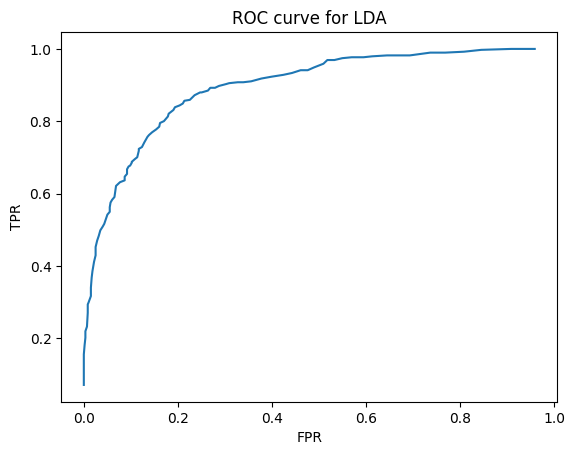

In [ ]:
# Get data for the roc curve
fprs, tprs = roc(lda, test[["x1", "x2"]].to_numpy(), test["y"])

# Plot it
fig, ax = plt.subplots()
ax.plot(fprs, tprs);
ax.set_title("ROC curve for LDA");
ax.set_xlabel("FPR");
ax.set_ylabel("TPR");

Let's see how `logistic regression` works:

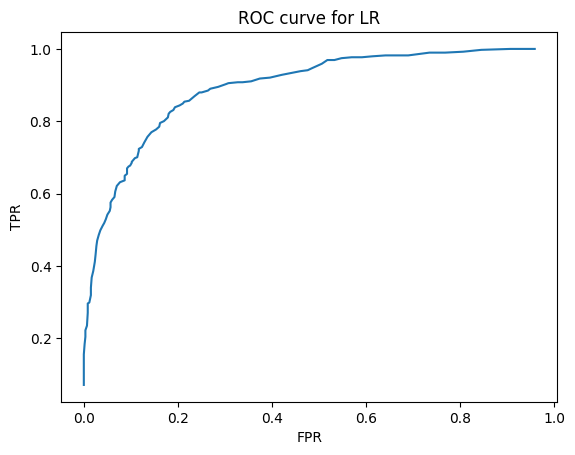

In [ ]:
# Train LR
lr = LogisticRegression().fit(train[['x1', 'x2']], train['y'])

# Get data for the roc curve
fprs, tprs = roc(lr, test[["x1", "x2"]].to_numpy(), test["y"])

# Plot it
fig, ax = plt.subplots()
ax.plot(fprs, tprs);
ax.set_title("ROC curve for LR");
ax.set_xlabel("FPR");
ax.set_ylabel("TPR");

Looks quite similar which is not surprising since both are relatively similar classifiers in terms of their complexity. In practice, what is rather more important is `AUC`, i.e. area under the curve. This is a value that allows you to compare two classifiers using a metric which:
- is `scale invariant` (It measures how well predictions are ranked, rather than their absolute values)
- considers all possible `decision thresholds`

Again, whether you end up using this metric or not depends solely on the problem at hand. If I know that I will be chaging the loss matrix therefore also the decision threshold, then `AUC` is actually nice since it gives me performance of the classifier for all possible thresholds.

> Computing loss matrix based on decision threshold

Now, let's investigate the following question: how would the loss matrix look like if our threshold for predicting red class (class 1) would be `.9`? Recall from the [exercise session 8](https://deepnote.com/workspace/ludekcizinsky-8f7f55a7-f3c7-4009-b3b2-b7b07fcdf5a7/project/ml202208-71ce8a7f-1815-46b1-bbeb-2be3f29e2449/%2FExercise8.ipynb) that we got the following expression:

$$
p(y=1|x) > \frac{L(2, 1)}{L(2, 1) + L(1, 2)}
$$

An example of a `loss matrix` that gives us a threshold `.9` therefore could be:

In [ ]:
lm = np.array([[0, 10], [90, 0]])
print(lm)

[[ 0 10]
 [90  0]]


From this matrix, we would get:

$$
p(y=1|x) > \frac{90}{100} = .9
$$

> Section summary

In this section, we have looked more closely into `roc curve` and corresponding `auc`. We also investigated the impact of decision threshold on the corresponding loss matrix.

---

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=31c83b6b-4a5b-4b67-8e9d-b5faf0f91c61' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>